Primeras filas:
   Index           Time_us  Ch1_val_uV         Ch1_ts_us  Ch2_val_uV  \
0      0  1765464702413009    -6389.76  1765464702413009         NaN   
1      1  1765464702413017    -6389.76  1765464702413009    -6389.76   
2      2  1765464702413022    -6389.76  1765464702413022    -6389.76   
3      3  1765464702413026    -6389.76  1765464702413022    -6389.76   
4      4  1765464702413028    -6389.76  1765464702413028    -6389.76   

      Ch2_ts_us  StimState       t_s  
0           NaN          0  0.000000  
1  1.765465e+15          0  0.000008  
2  1.765465e+15          0  0.000013  
3  1.765465e+15          0  0.000017  
4  1.765465e+15          0  0.000019  


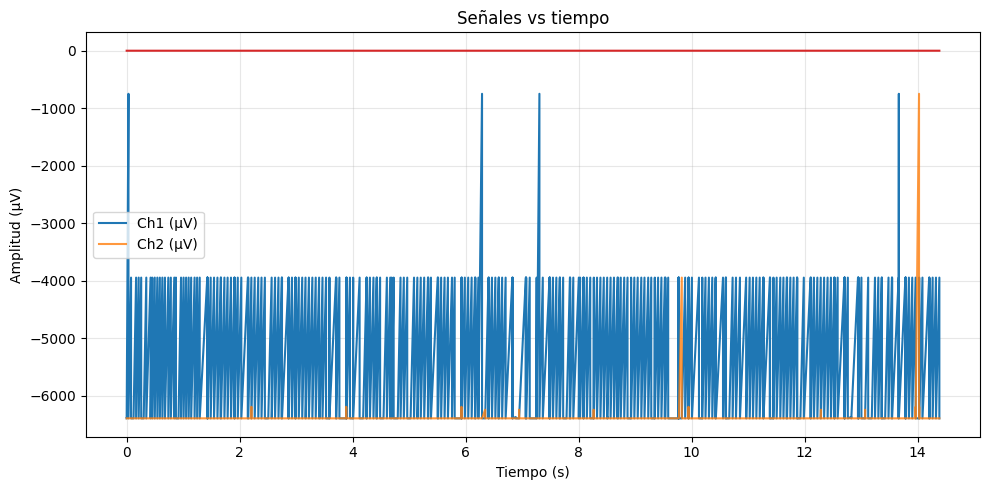

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Parámetros ---
ruta_csv_ecg = "P011_STIM_EVENTS_20251211_173938.csv"  # Cambia por la ruta real a tu archivo

# --- Carga del CSV ---
# sep=';'  -> separador por punto y coma
# decimal=',' -> coma como separador decimal
# na_values=[''] -> trata cadenas vacías como NaN
df = pd.read_csv(
    ruta_csv_ecg,
    sep=';',
    decimal=',',
    na_values=['']
)

# --- Limpieza y preparación ---
# Asegura tipos numéricos (por si alguna lectura entró como texto)
for col in ['Time_us', 'Ch1_val_uV', 'Ch1_ts_us', 'Ch2_val_uV', 'Ch2_ts_us', 'StimState']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Crea tiempo relativo en segundos (más cómodo para graficar)
# Usa la columna 'Time_us' si existe; si no, intenta 'Ch1_ts_us'
if 'Time_us' in df.columns and df['Time_us'].notna().any():
    t0 = df['Time_us'].iloc[0]
    df['t_s'] = (df['Time_us'] - t0) / 1e6
elif 'Ch1_ts_us' in df.columns and df['Ch1_ts_us'].notna().any():
    t0 = df['Ch1_ts_us'].iloc[0]
    df['t_s'] = (df['Ch1_ts_us'] - t0) / 1e6
else:
    # Si no hay timestamps, usa el índice como tiempo (no ideal, pero funcional)
    df['t_s'] = df.index.astype(float)

print("Primeras filas:")
print(df.head())

# --- Visualización básica ---
plt.figure(figsize=(10, 5))
if 'Ch1_val_uV' in df.columns:
    plt.plot(df['t_s'], df['Ch1_val_uV'], label='Ch1 (µV)', color='tab:blue')
if 'Ch2_val_uV' in df.columns and df['Ch2_val_uV'].notna().any():
    plt.plot(df['t_s'], df['Ch2_val_uV'], label='Ch2 (µV)', color='tab:orange', alpha=0.8)
plt.plot(df['t_s'], df['StimState']*1000, color='tab:red')
plt.title('Señales vs tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (µV)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




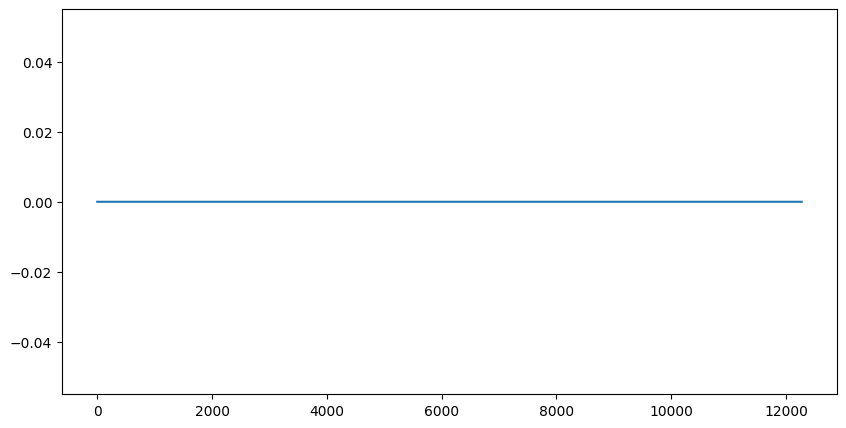

In [29]:
# --- Visualización básica ---
plt.figure(figsize=(10, 5))
plt.plot(df['StimState'], color='tab:blue')


In [34]:
ruta_csv_stim = "ee_STIM_EVENTS_20251211_155156.csv"  # Cambia por la ruta real a tu archivo

# --- Carga del CSV ---
# sep=';'  -> separador por punto y coma
# decimal=',' -> coma como separador decimal
# na_values=[''] -> trata cadenas vacías como NaN
df_stim = pd.read_csv(
    ruta_csv_stim,
    sep=';',
    decimal=',',
    na_values=['']
)


df_stim.columns

Index(['Event', 'ts_us', 'ch1_idx', 'ch2_idx'], dtype='object')

In [ ]:
for col in ['Event', 'ts_us', 'ch1_idx', 'ch2_idx']:
    if col in df_stim.columns:
        df_stim[col] = pd.to_numeric(df_stim[col], errors='coerce')



# Crea tiempo relativo en segundos (más cómodo para graficar)
# Usa la columna 'Time_us' si existe; si no, intenta 'Ch1_ts_us'
if 'ts_us' in df_stim.columns and df_stim['ts_us'].notna().any():
    t0 = df_stim['ts_us'].iloc[0]
    df_stim['t_s'] = (df_stim['ts_us'] - t0) / 1e6

plt.plot(df_stim['StimState'], color='tab:blue')

,Event,ts_us,ch1_idx,ch2_idx,t_s
0,NaN,1765464707439494,4205,4397,0.000000
1,NaN,1765464707439651,4205,4397,0.000157
2,NaN,1765464707559824,4285,4481,0.120330
3,NaN,1765464707560229,4285,4481,0.120735
